In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

In [419]:
#importamos el dataset con las entevistas realizadas
young = pd.read_csv('./diario.csv', sep=';')

In [420]:
# Ejemplo de datos
young['fecha_datetime'] = pd.to_datetime(young['Fecha'], format='%d/%m/%Y')
young['Hora dormir']= pd.to_datetime(young['Hora a la que te dormiste'], format='%H:%M')
young['Hora despertar']=pd.to_datetime(young['Hora de despertar'], format='%H:%M')
young['horas_de_activacion'] = abs((young['Hora despertar'] - young['Hora dormir']).dt.total_seconds()/3600)

In [421]:
young=young.drop("Ciclo menstrual",1)

C:\Users\cris_\AppData\Local\Temp/ipykernel_7032/1790516259.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  young=young.drop("Ciclo menstrual",1)


In [422]:
young=young.replace(to_replace="No", value=0)
young = young.replace(to_replace="Si", value=1)
young=young.replace(to_replace="NO", value=0)
young=young.replace(to_replace="no", value=0)
young = young.replace(to_replace="SI", value=1)

In [423]:
young=young[young["Código"]=="M"]

In [424]:
columns=['fecha_datetime','Motivación','Calidad del sueño','Ansiedad','Irritabilidad','Estado de ánimo']

In [425]:
young=young[columns]

In [426]:
young.set_index('fecha_datetime', inplace=True)

In [427]:
young

,Motivación,Calidad del sueño,Ansiedad,Irritabilidad,Estado de ánimo
fecha_datetime,,,,,
2017-06-07,0,2,2,3,0
2017-06-11,-2,1,3,3,-2
2017-06-12,-3,4,1,2,-2
2017-06-12,-1,3,1,3,0
2017-06-14,-2,3,2,3,0
...,...,...,...,...,...
2018-01-31,-2,3,2,1,-2
2018-02-01,-2,1,3,1,-2
2018-02-02,-2,1,2,1,-2


In [440]:
features=['Motivación','Calidad del sueño','Ansiedad','Irritabilidad','Estado de ánimo']

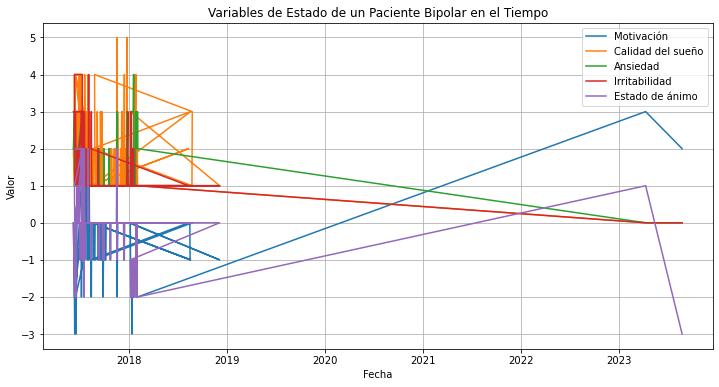

In [454]:
plt.figure(figsize=(12, 6))

for feature in features:
# Visualizar las variables de estado en el tiempo
    plt.plot(young.index, young[feature], label=feature)
plt.title('Variables de Estado de un Paciente Bipolar en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [468]:
# Parámetros ARIMA (p, d, q) para todas las variables
parametros_arima = (1, 1, 1)

In [497]:
young.index[-1].normalize()

Timestamp('2023-08-24 00:00:00')

In [498]:
forecast_steps=30

In [507]:

# Crear un DataFrame vacío para almacenar las predicciones
predicciones_df = pd.DataFrame(index=young.index)

for feature in features:
    # Ajustar un modelo ARIMA para la variable actual
    modelo_arima = ARIMA(young[feature], order=parametros_arima)
    modelo_arima_entrenado = modelo_arima.fit()
    
    predicciones = modelo_arima_entrenado.forecast(steps=forecast_steps)
     # Crear un índice para las predicciones que coincida con el de la base de datos de pacientes
    indice_predicciones = pd.date_range(start=young.index[-1], periods=forecast_steps, closed='right')
    
    
    
     # Ajustar el índice para que no incluya la parte horaria
    indice_predicciones = indice_predicciones.normalize()
    
    # Crear un DataFrame temporal para las predicciones
    predicciones_temp = pd.DataFrame(data={variable + '_pred': predicciones}, index=indice_predicciones)
    
    # Concatenar las predicciones al DataFrame de predicciones
    predicciones_df = pd.concat([predicciones_df, predicciones_temp], axis=1)


    # Agregar las predicciones al DataFrame de predicciones
    predicciones_df[variable + '_pred'] = predicciones.values

# Establecer el índice de predicciones_df para que coincida con el de data_pacientes_bipolares
predicciones_df.index = young.index[-1] + pd.DateOffset(days=1) + pd.to_timedelta(range(30), unit='D')

C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

,Motivación,Calidad del sueño,Ansiedad,Irritabilidad,Estado de ánimo
fecha_datetime,,,,,
2017-06-07,0,2,2,3,0
2017-06-11,-2,1,3,3,-2
2017-06-12,-3,4,1,2,-2
2017-06-12,-1,3,1,3,0
2017-06-14,-2,3,2,3,0
...,...,...,...,...,...
2018-01-31,-2,3,2,1,-2
2018-02-01,-2,1,3,1,-2
2018-02-02,-2,1,2,1,-2


In [508]:
# Visualizar las predicciones
plt.figure(figsize=(12, 8))

for variable in features:
    #plt.plot(predicciones_df.index, predicciones_df[variable + '_pred'], linestyle='dashed', label=f'{variable} Predicción')
    plt.plot(predicciones_df.index, predicciones_df[variable], linestyle='dashed', label=f'{variable} Predicción')
plt.title('Predicciones de Variables de Estado de Pacientes Bipolares en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.show()

KeyError: 'Motivación'

<Figure size 864x576 with 0 Axes>

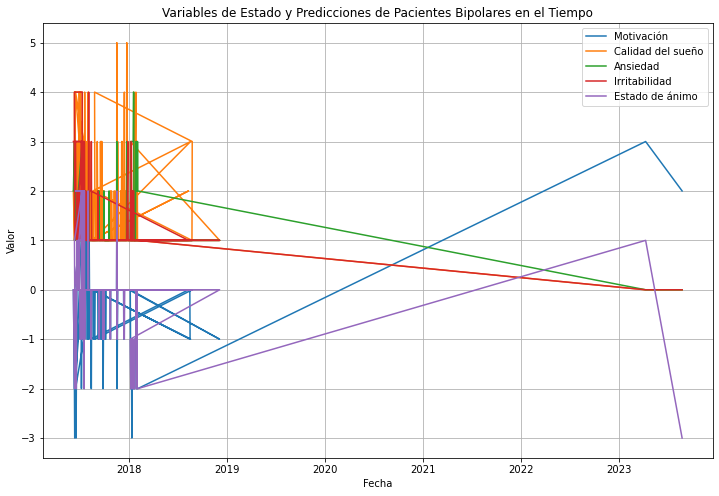

In [472]:
plt.figure(figsize=(12, 8))

for feature in features:
    plt.plot(young.index, young[feature], label=feature)
    

plt.title('Variables de Estado y Predicciones de Pacientes Bipolares en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [473]:

# Ajustar el modelo ARIMA para predecir el estado de ánimo (por ejemplo)
p = 1  # Orden del componente autoregresivo
d = 1  # Orden de diferenciación
q = 1  # Orden del componente de media móvil

# Ajustar el modelo ARIMA para el estado de ánimo
model = ARIMA(young['Motivación'], order=(p, d, q))
results = model.fit()

# Realizar predicciones para el estado de ánimo (por ejemplo)
forecast_steps = 30  # Número de pasos a predecir (30 días en este caso)
forecast = results.get_forecast(steps=forecast_steps).predicted_mean



C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\cris_\anaconda3\lib\site-

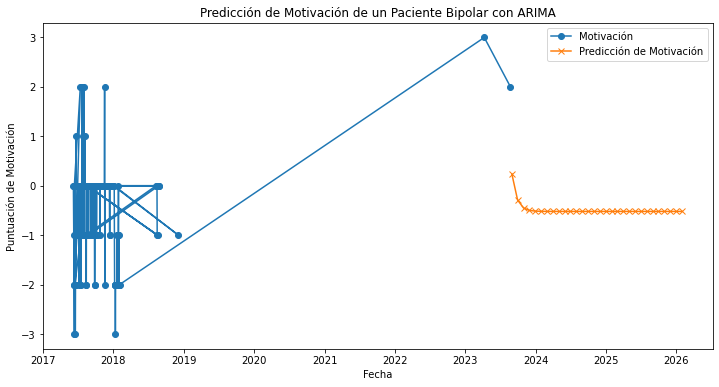

In [437]:
# Visualizar las predicciones para el estado de ánimo
plt.figure(figsize=(12, 6))
plt.plot(young.index, young['Motivación'], label='Motivación', marker='o')
plt.plot(pd.date_range(start=young.index[-1], periods=forecast_steps, freq='M'), forecast, label='Predicción de Motivación', marker='x')
plt.title('Predicción de Motivación de un Paciente Bipolar con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Puntuación de Motivación')
plt.legend()
plt.show()